<a href="https://colab.research.google.com/github/rjalokssb/Machine-Learning-Projects/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster
 
Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)

## Downloading Dataset

In [1]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/competitions/titanic/data'

od.download(dataset_url)

## Import Modules

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [5]:
train_df = pd.read_csv('/content/titanic/train.csv')
test_df = pd.read_csv('/content/titanic/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
## statistical info
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
## datatype info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


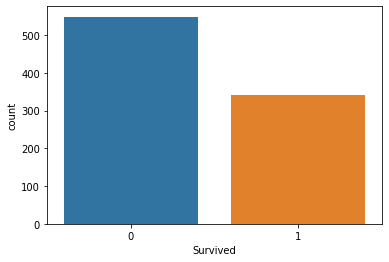

In [11]:
## categorical attributes
sns.countplot(train_df['Survived'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


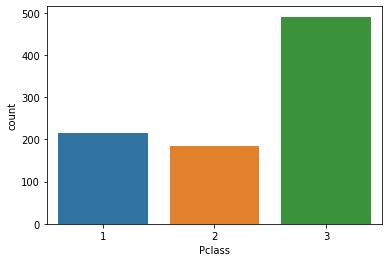

In [12]:
sns.countplot(train_df['Pclass'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


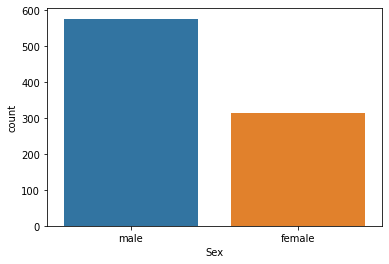

In [13]:
sns.countplot(train_df['Sex'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


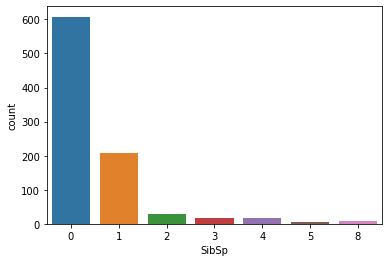

In [14]:
sns.countplot(train_df['SibSp'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


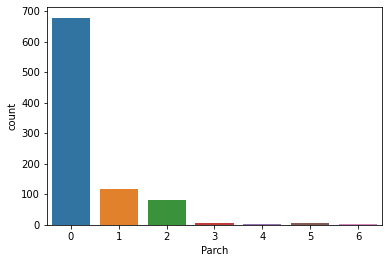

In [15]:
sns.countplot(train_df['Parch'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


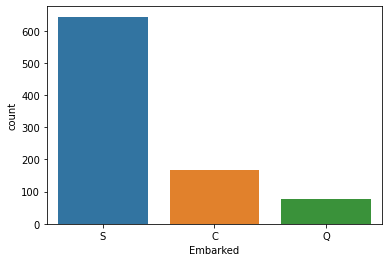

In [16]:
sns.countplot(train_df['Embarked'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


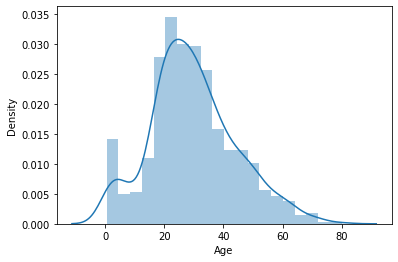

In [18]:
## numerical attributes
sns.distplot(train_df['Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


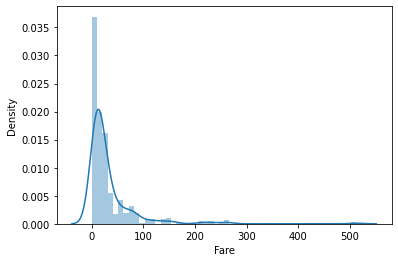

In [19]:
sns.distplot(train_df['Fare'])

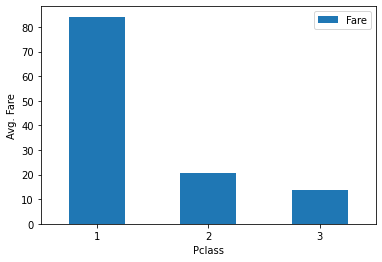

In [21]:
class_fare = train_df.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

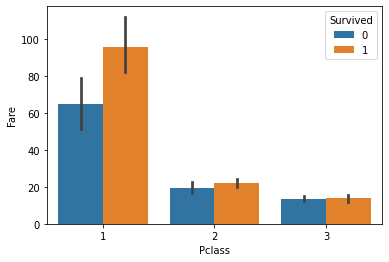

In [24]:
sns.barplot(data=train_df, x='Pclass', y='Fare', hue='Survived')

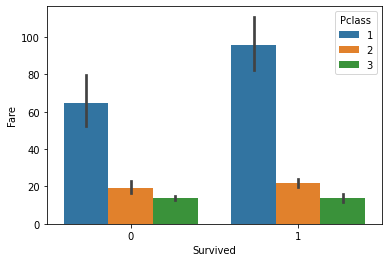

In [25]:
sns.barplot(data=train_df, x='Survived', y='Fare', hue='Pclass')

## Data Preprocessing

In [27]:
train_len = len(train_df)
# combine two dataframes
df = pd.concat([train_df, test_df], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [29]:
## find the null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [30]:
# drop or delete the column
df = df.drop(columns=['Cabin'], axis=1)

In [31]:
df['Age'].mean()

29.881137667304014

In [32]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [34]:
df['Embarked'].mode()[0]

'S'

In [35]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## Log transformation for uniform data distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


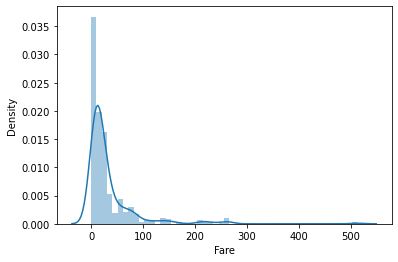

In [36]:
sns.distplot(df['Fare'])

In [37]:
df['Fare'] = np.log(df['Fare']+1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


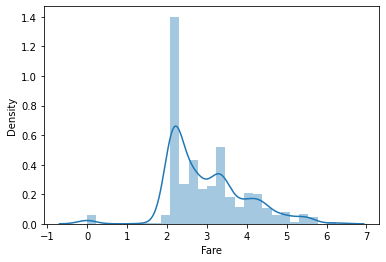

In [38]:
sns.distplot(df['Fare'])

## Correlation Matrix

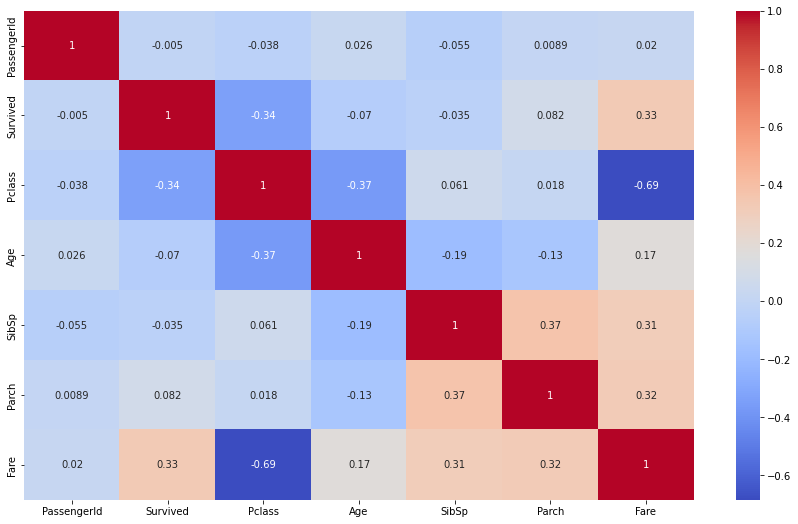

In [39]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [41]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


## Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


## Train-Test Split

In [43]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [45]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [46]:
# input split
inputs = train.drop(columns=['PassengerId', 'Survived'], axis=1)
targets = train['Survived']

In [47]:
inputs.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


## Model Training

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.25, random_state=42)

In [52]:
print(train_targets.shape)
print(val_targets.shape)

(668,)
(223,)


In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.25, random_state=42)
    model.fit(train_inputs, train_targets)
    print('Accuracy:', model.score(val_inputs, val_targets))
    
    score = cross_val_score(model, inputs, targets, cv=5)
    print('CV Score:', np.mean(score))

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.7833971502102819


In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7399103139013453
CV Score: 0.767729583830268


In [62]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8026905829596412
CV Score: 0.8081225284037412


In [63]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7937219730941704
CV Score: 0.7912685958194714


In [64]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.820627802690583
CV Score: 0.8226916075575922


In [65]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

Accuracy: 0.8116591928251121
CV Score: 0.8327976900382901


In [68]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

ModuleNotFoundError: ignored

## Complete Model Training with Full Data

In [70]:
model = LGBMClassifier()
model.fit(inputs, targets)

LGBMClassifier()

In [71]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [72]:
# input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [73]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


In [74]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

## Test Submission

In [75]:
sub = pd.read_csv('/content/titanic/gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [76]:
sub.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [77]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')

In [78]:
sub.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [79]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [80]:
sub.to_csv('submission.csv', index=False)